In [117]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
from sklearn_pandas import CategoricalImputer
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score


In [118]:
train = pd.read_csv("C:/Users/Aakash Sharma/Desktop/Projects/LTFS Data Science FinHack 2/train_fwYjLYX.csv")
train.head()

,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0


In [119]:
train.describe(include='all')

,application_date,segment,branch_id,state,zone,case_count
count,80402,80402.000000,66898.000000,80402,66898,80402.000000
unique,844,NaN,NaN,20,5,NaN
top,2019-01-17,NaN,NaN,MAHARASHTRA,EAST,NaN
freq,99,NaN,NaN,11322,21762,NaN
mean,NaN,1.167956,118.831325,NaN,NaN,185.481841
std,NaN,0.373830,94.285434,NaN,NaN,749.602925
min,NaN,1.000000,1.000000,NaN,NaN,0.000000
25%,NaN,1.000000,36.000000,NaN,NaN,0.000000
50%,NaN,1.000000,82.000000,NaN,NaN,18.000000
75%,NaN,1.000000,248.000000,NaN,NaN,60.000000


In [120]:
train.isnull().sum()

application_date        0
segment                 0
branch_id           13504
state                   0
zone                13504
case_count              0
dtype: int64

## EDA

In [121]:
# By making of Distribution Graph we can assume that there is some skewness in the Price
print ("Skew is:", train.case_count.skew())
print("Kurtosis: %f" % train.case_count.kurt())

Skew is: 8.395878288684498
Kurtosis: 88.687637


'plt.xlabel("Item_Outlet_Sales")\nplt.ylabel("Number of Sales")\nplt.title("Item_Outlet_Sales Distribution")'

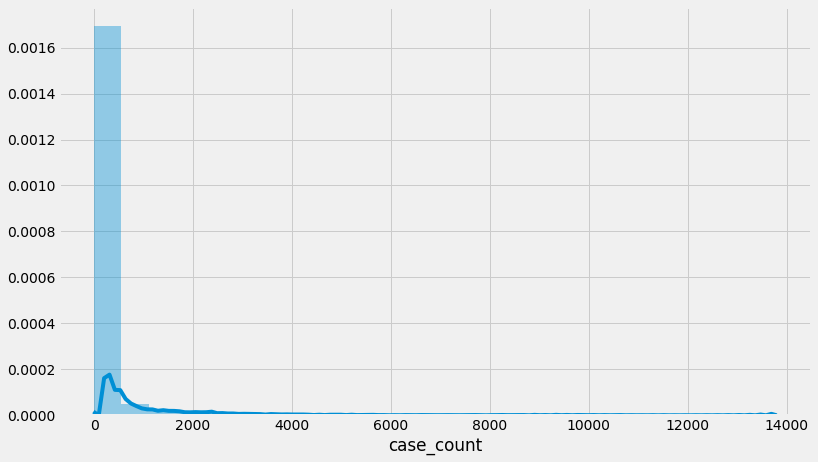

In [122]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sb.distplot(train.case_count, bins = 25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
'''plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")'''

### `application date vs case_count`

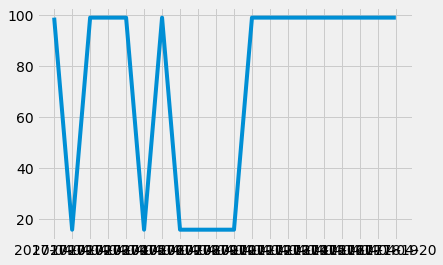

In [123]:
app = train.groupby(['application_date'])['case_count'].count().head(20)
plt.plot(app)

### `segment vs case_count`

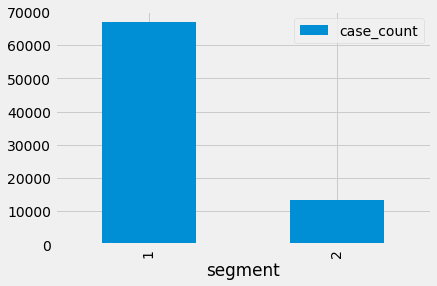

In [124]:
seg = train.groupby(['segment'])['case_count'].count().reset_index()
seg.plot.bar(x = 'segment', y = 'case_count')


Segment 1 have high number of cases

### `state vs case_count`

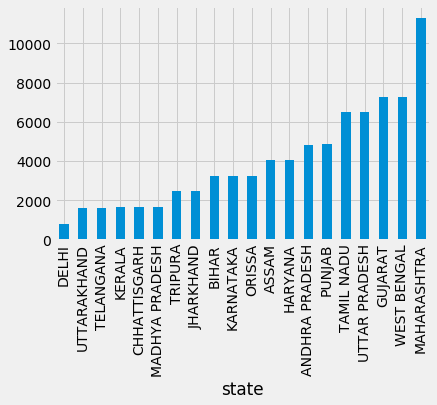

In [125]:
stat = train.groupby(['state'])['case_count'].count().sort_values()
stat.plot.bar(x = 'state', y = 'case_count')

Maharashtra have high number of cases and Delhi count low number of cases.

### `Zone vs case_count`

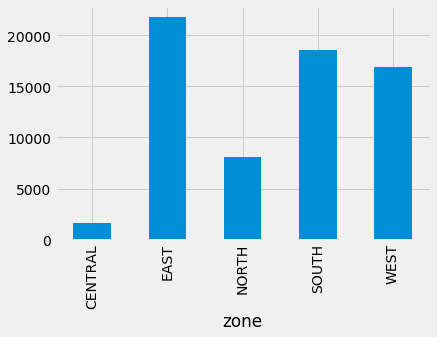

In [126]:
train.groupby(['zone'])['case_count'].count().plot.bar(x = 'zone', y = 'case_count')

In zone EAST have high number of cases

## Data Preprocessing

In [127]:
train = pd.read_csv("C:/Users/Aakash Sharma/Desktop/Projects/LTFS Data Science FinHack 2/train_fwYjLYX.csv")
test = pd.read_csv("C:/Users/Aakash Sharma/Desktop/Projects/LTFS Data Science FinHack 2/test_1eLl9Yf.csv")

In [128]:
train.head()

,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0


In [129]:
# Join Train and Test Dataset
train['source']='train'
test['source']='test'
    
data = pd.concat([train,test], ignore_index = True)
#data.to_csv("C:/Users/Aakash Sharma/Desktop/Projects/LTFS Data Science FinHack 2/data.csv",index=False)
print(train.shape, test.shape, data.shape)

(80402, 7) (180, 4) (80582, 8)


C:\Users\Aakash Sharma\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [130]:
data.head()

,application_date,branch_id,case_count,id,segment,source,state,zone
0,2017-04-01,1.0,40.0,NaN,1,train,WEST BENGAL,EAST
1,2017-04-03,1.0,5.0,NaN,1,train,WEST BENGAL,EAST
2,2017-04-04,1.0,4.0,NaN,1,train,WEST BENGAL,EAST
3,2017-04-05,1.0,113.0,NaN,1,train,WEST BENGAL,EAST
4,2017-04-07,1.0,76.0,NaN,1,train,WEST BENGAL,EAST


In [131]:
#data.drop(['branch_id','id','state','zone'],axis=1, inplace = True)

In [132]:
data.isnull().sum()

application_date        0
branch_id           13684
case_count            180
id                  80402
segment                 0
source                  0
state                 180
zone                13684
dtype: int64

In [133]:
data.head()

,application_date,branch_id,case_count,id,segment,source,state,zone
0,2017-04-01,1.0,40.0,NaN,1,train,WEST BENGAL,EAST
1,2017-04-03,1.0,5.0,NaN,1,train,WEST BENGAL,EAST
2,2017-04-04,1.0,4.0,NaN,1,train,WEST BENGAL,EAST
3,2017-04-05,1.0,113.0,NaN,1,train,WEST BENGAL,EAST
4,2017-04-07,1.0,76.0,NaN,1,train,WEST BENGAL,EAST


In [134]:
data['application_date'] = pd.to_datetime(data['application_date'])

In [135]:
data['year'] = data['application_date'].dt.year

In [136]:
data['month'] = data['application_date'].dt.month

In [137]:
data['day'] = data['application_date'].dt.day

In [138]:
data['branch_id'] = data['branch_id'].fillna(82.0)

In [139]:
data['branch_id'] = data['branch_id'].astype(int)

In [140]:
cat_imputer = CategoricalImputer()
data['state'] = cat_imputer.fit_transform(data['state'])
data['zone'] = cat_imputer.fit_transform(data['zone'])

In [141]:
le = LabelEncoder()
data['state'] = le.fit_transform(data['state'])
data['zone'] = le.fit_transform(data['zone'])

## Exporting data


In [142]:
#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['case_count','source','application_date','id','branch_id'],axis=1,inplace=True)
train.drop(['source','application_date','id','branch_id'],axis=1,inplace=True)

#Export files as modified versions:
#train.to_csv("C:/Users/Aakash Sharma/Desktop/Projects/LTFS Data Science FinHack 2/train_modified.csv",index=False)
#test.to_csv("C:/Users/Aakash Sharma/Desktop/Projects/LTFS Data Science FinHack 2/test_modified.csv",index=False)

C:\Users\Aakash Sharma\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Model, Predict and Solve the problem

In [178]:
train_new = pd.read_csv("C:/Users/Aakash Sharma/Desktop/Projects/LTFS Data Science FinHack 2/train_modified.csv")
test_new = pd.read_csv("C:/Users/Aakash Sharma/Desktop/Projects/LTFS Data Science FinHack 2/test_modified.csv")
sub = pd.read_csv("C:/Users/Aakash Sharma/Desktop/Projects/LTFS Data Science FinHack 2/sample_submission_IIzFVsf.csv")

In [179]:
train_new.head()

,case_count,segment,state,zone,year,month,day,festival_holiday
0,40,1,19,1,2017,4,1,0
1,5,1,19,1,2017,4,3,0
2,4,1,19,1,2017,4,4,0
3,113,1,19,1,2017,4,5,1
4,76,1,19,1,2017,4,7,0


In [180]:
test_new.head()

,segment,state,zone,year,month,day,festival_holiday
0,1,11,1,2019,7,6,0
1,1,11,1,2019,7,7,0
2,1,11,1,2019,7,8,0
3,1,11,1,2019,7,9,0
4,1,11,1,2019,7,10,0


In [181]:
train_new['case_count'] = train_new['case_count'].astype(int)

In [182]:
#Dividing the data into test and train datasets
X = train_new.drop(['case_count'],axis=1)
y = train_new.case_count
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [184]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf = rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print('MAPE', mean_absolute_error(y_test, y_pred))


MAPE 59.391652817783964


In [185]:
print('rmse',np.sqrt(mean_squared_error(y_test, y_pred)))

rmse 212.8423266693104


In [186]:
print(r2_score(y_test, y_pred))

0.9169550969688517


In [187]:
y_pred

array([  1.55988095, 114.33674088, 424.63      , ...,  15.34556169,
       319.90835374,  42.70778316])

## Predict the case_count of the test set

In [188]:
#Predict training set:
predictors = train_new.columns.drop(['case_count'])
train_new_predictions = rf.predict(train_new[predictors])
target = 'case_count'

In [189]:
# make predictions using actual model
test_new[target] = rf.predict(test_new[predictors])
#test_new[target].to_csv("C:/Users/Aakash Sharma/Desktop/Projects/predict-book-price_Participants_Data-20190926T094854Z-001/Participants_Data/sample_purchase.csv")
test_new[target]

0       12.030000
1       12.880000
2       10.490000
3       10.173333
4       13.870000
          ...    
175    530.330000
176    375.020000
177    512.550000
178    510.390000
179    562.100000
Name: case_count, Length: 180, dtype: float64

In [190]:
final_submission = pd.DataFrame({'id':sub['id'],'application_date':sub['application_date'],'segment':sub['segment'],'case_count':round(test_new[target]).astype(int)})

In [191]:
final_submission.set_index('id',inplace=True)

In [192]:
final_submission.to_csv("C:/Users/Aakash Sharma/Desktop/Projects/LTFS Data Science FinHack 2/final_submission.csv")

In [193]:
final_submission.head()

,application_date,segment,case_count
id,,,
1,2019-07-06,1,12
2,2019-07-07,1,13
3,2019-07-08,1,10
4,2019-07-09,1,10
5,2019-07-10,1,14
